<a href="https://colab.research.google.com/github/sammmy047/ML_MAJOR_PROJECT/blob/main/SENTIMENT_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import spacy

from xgboost import XGBClassifier
from sklearn.svm import LinearSVC

In [2]:
data = pd.read_csv('/content/Reddit_Data.csv.zip')
data.rename(columns = {'clean_comment': 'text'}, inplace = True)

In [3]:
data.head()

,text,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [4]:
data.isna().sum()

text        100
category      0
dtype: int64

In [35]:
data['category'].value_counts()

 1    15830
 0    13042
-1     8277
Name: category, dtype: int64

In [6]:
data.dropna(axis = 0, inplace = True)

In [7]:
data.isna().sum()


text        0
category    0
dtype: int64

In [8]:
data.info

<bound method DataFrame.info of                                                     text  category
0       family mormon have never tried explain them t...         1
1      buddhism has very much lot compatible with chr...         1
2      seriously don say thing first all they won get...        -1
3      what you have learned yours and only yours wha...         0
4      for your own benefit you may want read living ...         1
...                                                  ...       ...
37244                                              jesus         0
37245  kya bhai pure saal chutiya banaya modi aur jab...         1
37246              downvote karna tha par upvote hogaya          0
37247                                         haha nice          1
37248             facebook itself now working bjp’ cell          0

[37149 rows x 2 columns]>

In [9]:
data.shape

(37149, 2)

In [10]:
x = data['text'].values
y = data['category'].astype(str).values

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=100)

In [38]:
pos_phrases = data[data.category == 1] ## 4 is positive sentiment
pos_string = []
for t in pos_phrases.text:
    pos_string.append(t)
pos_text = pd.Series(pos_string).str.cat(sep=' ')
pos_text[:100]

' family mormon have never tried explain them they still stare puzzled from time time like some kind '

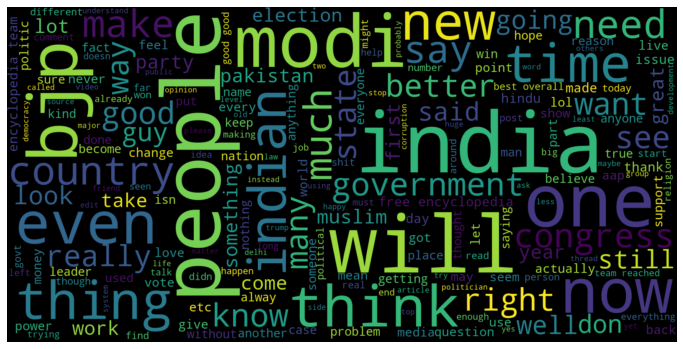

In [40]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(pos_text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [49]:
neg_phrases = data[data.category == -1]
neg_words = []
for t in neg_phrases.text:
    neg_words.append(t)
neg_words[:4]

['seriously don say thing first all they won get its too complex explain normal people anyway and they are dogmatic then doesn matter what you say see mechante post and for any reason you decide later life move from buddhism and that doesn suit you identity though you still get keep all the wisdom then your family will treat you like you went through weird hippy phase for while there didncha and you never hear the end pro tip don put one these your wall jpg ',
 'you should all sit down together and watch the simpsons episode where lisa becomes buddhist simpsons season episode she little faith then discuss ',
 'there are two varieties christians dogmatic that dwell words and conservative that take heart the spirit the teachings hate oversimplify things but helps this understanding you are discussing with dogmatic religious people who live the letter the law will uphill battle wish you luck you are discussing with moderates exchange idea should come fairly easily comparing contrasting al

In [50]:
neg_text = pd.Series(neg_words).str.cat(sep=' ')
neg_text[:100]

'seriously don say thing first all they won get its too complex explain normal people anyway and they'

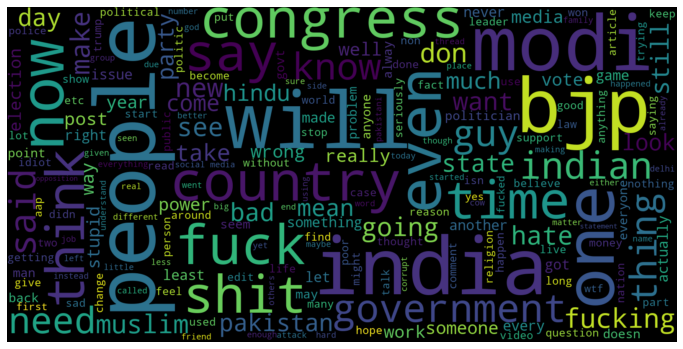

In [51]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(neg_text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

In [13]:
vect = CountVectorizer(stop_words='english')
vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [14]:
x_train_vect = vect.fit_transform(x_train.astype("U"))
x_test_vect = vect.transform(x_test)

In [15]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_train_vect,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [16]:
y_pred = model.predict(x_test_vect)

In [17]:
from sklearn.metrics import accuracy_score,classification_report

In [18]:
accuracy_score(y_pred,y_test)

0.7698519515477793

In [19]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

          -1       0.48      0.84      0.61      1450
           0       0.95      0.72      0.82      5176
           1       0.77      0.81      0.79      4519

    accuracy                           0.77     11145
   macro avg       0.74      0.79      0.74     11145
weighted avg       0.82      0.77      0.78     11145



In [24]:
test = data['text'][65]
test

' must transitioning new avatar'

In [25]:
data['category'][65]

1

In [26]:
test = vect.transform([data['text'][65]])
model.predict(test)

array(['1'], dtype=object)

In [27]:
from sklearn.pipeline import make_pipeline
text_model = make_pipeline(CountVectorizer(),SVC())

text_model.fit(x_train,y_train)

y_pred = text_model.predict(x_test)
y_pred


array(['0', '0', '0', ..., '1', '0', '1'], dtype=object)

In [28]:
text_model.predict([data['text'][0]])

array(['1'], dtype=object)

In [29]:
text_model

Pipeline(memory=None,
         steps=[('countvectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
        

In [30]:
import joblib
joblib.dump(text_model,'Sentiment-Analysis')

['Sentiment-Analysis']

In [31]:
!pip install streamlit --quiet
!pip install pyngrok==4.1.1
from pyngrok import ngrok

     |████████████████████████████████| 7.8MB 5.3MB/s 
     |████████████████████████████████| 112kB 43.1MB/s 
     |████████████████████████████████| 174kB 48.7MB/s 
     |████████████████████████████████| 81kB 7.4MB/s 
     |████████████████████████████████| 4.2MB 19.1MB/s 
     |████████████████████████████████| 71kB 7.8MB/s 
     |████████████████████████████████| 122kB 52.2MB/s 
ERROR: ipykernel 6.0.1 has requirement ipython>=7.23.1, but you'll have ipython 5.5.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 6.0.1 which is incompatible.
  Created wheel for pyngrok: filename=pyngrok-4.1.1-cp37-none-any.whl size=15985 sha256=a978fde9a099ae2761d7b9ff09ebe451513d988471fb5fe07ae4b38afcef1292
  Stored in directory: /root/.cache/pip/wheels/97/71/0d/1695f7c8815c0beb3b5d9b35d6eec9243c87e6070fbe3977fa
Successfully built pyngrok


In [32]:
%%writefile app.py
# It is a magic command to create a .py file
import streamlit as st
import joblib
st.title('Sentiment Analysis Deployment')
test_model = joblib.load('/content/Sentiment-Analysis')
ip = st.text_input('Enter your message')
op = test_model.predict([ip])
if op[0] == '1':
  result = 'POSITIVE COMMENT'
elif op[0] == '0':
  result = 'NEUTRAL COMMENT'
else:
  result = 'NEGATIVE COMMENT'
if st.button('Predict'):
  st.title(result)

Writing app.py


In [33]:
!nohup streamlit run app.py &
url = ngrok.connect(port ='8501')
url

nohup: appending output to 'nohup.out'


'http://fb784f6dddad.ngrok.io'